In [101]:
import numpy as np
import random
import matplotlib.pyplot as plt
import sys
import molecules as mc
import forces as fc



In [102]:
def force(x, cut_off = 0.5):
  if x > cut_off:
    return - 9*np.exp(-0.5*x)
  else:
    return 10

In [103]:
import scipy.constants as consts
EPS0 = consts.epsilon_0#electric permittivity of vacuum
EPS =  72#dielectric constant of the solvent, estimated to be in range [70,75] so far based on papers
PHII = 8 #electrostaticpotential at the surface of particle i, generalized to be 8 based on papers
#KAPPA = #inverse Debye length
TEMPERATURE = 309.15 #kelvin = 36C
I = 0.08 #Ionic strength, defined as (M,mol L)

#steric repulstion constats:
sigma = 0.013 #grafting density
H = 7 #width of the polyelectrolyte brush in nm


def steric_cust(m1,m2):
  h = (mc.dist(m1,m2)-m1.radius-m2.radius)

  if (h > 2*H):
    return 0
  
  a_eff = ((1/m1.radius) + (1/m2.radius)) ** (-1)                # small positive value
  fst_nominator = 16 * np.pi * a_eff * H * H * (sigma ** (3/2))  
  fst_denominator = 35 # * SIGMA

  y = (h / (2*H))

  snd = 28 * (y**(-1/4) - 1)
  trd = (20/11) * (1 - y**(11/4))
  fth = 12 * (y - 1)

  U_st = (fst_nominator / fst_denominator) * (snd + trd + fth)

  return U_st

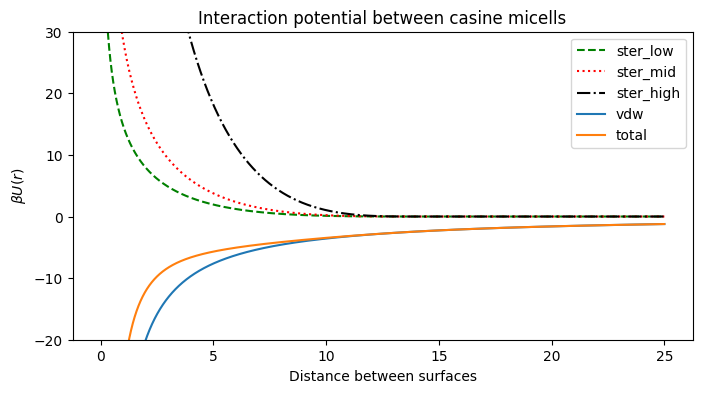

[807.1631027960916, 338.887706437814, 281.1915475139063, 251.33982927026443, 231.80439519892144, 217.54372129823528, 206.4455224701331, 197.43615142641852, 189.8999129448701, 183.4530777192217]
[1565.9921852858215, 657.4823578192207, 545.5449641464164, 487.6290889968224, 449.7280291169609, 422.06062979206183, 400.52880731981145, 383.0495585782326, 368.42836178706006, 355.92073656457615]
[1.0000000e-05 2.6000240e-04 5.1000480e-04 7.6000720e-04 1.0100096e-03
 1.2600120e-03 1.5100144e-03 1.7600168e-03 2.0100192e-03 2.2600216e-03]


In [113]:
dists = np.linspace(0.00001,25,100000)
vdws = []
# ess = []
sters1 = []
sters2 = []
sters3 = []


for i in dists:
  radius = 500
  dist_between = 500 + 500 + i#2*radius + i
  tm1 = mc.Molecule(np.array([0.0,0.0,0.0]),500)
  tm2 = mc.Molecule(np.array([dist_between,0.0,0.0]),500)
  vdws.append(fc.vdw(tm1,tm2))
  #ess.append(fc.elec_rep(tm1,tm2))
  #ess.append(fc.elec_repv2(tm1,tm2))
  #ess.append(fc.elec_rep3(tm1,tm2))
  sigma = 0.006 * 0.225
  sters1.append(steric_cust(tm1,tm2))

  sigma = 0.006 * 0.35
  sters2.append(steric_cust(tm1,tm2))

  sigma = 0.006
  sters3.append(steric_cust(tm1,tm2))

#print(dists)
#print(vdws)
#print(ess)
#print(sters)

#total_fs = [v + e + s for (v,e,s) in zip(vdws,ess,sters)]


plt.figure(figsize=(8,4))

plt.plot(dists, sters1, c="green", label = "ster_low", linestyle='--')
plt.plot(dists,sters2,c="red",label="ster_mid",linestyle=":")
plt.plot(dists,sters3,color = "black", label="ster_high",linestyle="-.")
total_fs = [v + e for (v,e) in zip(vdws,sters1)]
plt.plot(dists,vdws, label = "vdw")
plt.plot(dists,total_fs, label = "total")
#plt.plot(dists,total_fs,color = "blue", label="$U_{tot}$")

plt.ylim((-20,30))
plt.title("Interaction potential between casine micells")
plt.xlabel("Distance between surfaces")
plt.ylabel(r"$\beta U(r)$")
plt.legend()
plt.show()
print(sters1[:10])
print(sters2[:10])
print(dists[:10])

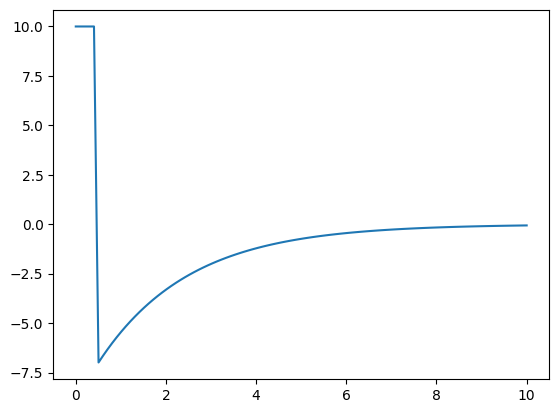

In [105]:
x = np.linspace(0,10,100)
res = [force(elm, 0.5) for elm in x]
#print(res[:10])
plt.figure()
#plt.yscale("log")
plt.plot(x,res)
plt.show()

In [106]:
lst = [-1,2,5,9]
print(any(lst > 0))

TypeError: '>' not supported between instances of 'list' and 'int'

In [107]:
8 if False else 4

4

In [108]:
test_pos = np.array([3,6,5])
maxs = np.array([4,5,6])
mins = [0,0,0]

print(np.any((test_pos > maxs)))

True


In [109]:
np.any([1,3,4] > maxs)

False

In [110]:
a = np.array([1,None,3])
a = None

if np.all(a) != None:
  print("yes")
else:
  print("False")

False
